# The Battle of Neighborhoods: Starting a Coffee Shop Business
__Build models for segmenting the neighborhoods to find the most conducive locations for starting a cafe business in Toronto City.__


by: [Diardano Raihan](https://www.linkedin.com/in/diardanoraihan)
<hr>

Welcome to the Coursera Appllied Data Science Capstone Project called __The Battle of the Neighborhoods__. We will mainly use this notebook throughout the project. 

__NOTE__: <u>We will only do simple codes and also present the results and insights obtained from pre1, pre2, and pre3 notebook.</u>

# Introduction
<hr>

## Business Problem

<img src='images/brand.jpg' alt='Toronto City - https://www.eater.com/' width = 200px>

__Kopiasli__ _(fictitious)_ is a coffee shop brand renowned for bringing a unique taste of authentic Indonesian coffee to their menus, such as:
- Mocca Java, 
- Toraja, 
- Bali Blue, 
- and even Luwak White Coffee. 

After successfully opening the first shop in New York City, __the coffee shop plans to expand its business in Toronto City.__
<br>
<br>

<figure> <img src='images/Toronto.jpg' alt='Toronto City - https://www.eater.com/' width = 500px/> </figure>

<u><b>Project Goal</u></b>

Toronto shares the same multicultural trait due to its large population of immigrants and is good for business. Thus, the __project goal__ is to figure out the city's most conducive locations for opening up a new coffee shop.

To ensure this project's success, the stakeholders require insights into the demographics, neighboring businesses, and crime rates. For example, the cafes present in each neighborhood, the most popular cafes, the foot traffic of our target demographic, and the neighborhoods' crime.

<u><b>Audience</u></b>

Knowing that the project will have many things to consider, this project is targeted to the entrepreneurs, stakeholders, and/or data science enthusiasts who might encounter the same challenge and wonder how data science could be applied to the questions at hand.

## Data Description

The followings are the data needed:

- [__1st Data__](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M):
The list of Toronto neighborhoods represented by postal codes on each borough. We will be using the Geocoder python package to retrieve the latitude and longitude of a given postal code.


- [__2nd Data__](https://developer.foursquare.com/): 
The popular or most common venues of a given neighborhood in Toronto. We will use FourSquare API to retrieve this data.


- [__3rd Data__](https://open.toronto.ca/dataset/wellbeing-toronto-safety/): 
The most updated record of crime incidents reported in Toronto City provided by Toronto's Police Services, Fire Services, Paramedic Services (formerly EMS), and Community Housing Corporation.


- [__4th Data__](https://open.toronto.ca/dataset/wellbeing-toronto-safety/):
The most updated record of traffic signal vehicle and pedestrian volumes in Toronto City. The data is typically collected between 7:30 a.m. and 6:00 p.m at intersections where there are traffic signals.


To sum up, we will use the 1st data to obtain the exact coordinates for each neighborhood based on the postal code, allowing us to explore and map the city. We will then use the coordinates and Foursquare credentials to access the 2nd data source through its API and retrieve the popular venues along with their details, especially for coffee shops. Finally, we will use the 3rd and 4th data to analyze the crime rates and foot traffic.

# Methodology
<hr>

## Analytic Approach

We approach the problem using the clustering technique, namely __k-Means__. This approach enables the audience to see how similar neighborhoods about their demographics. We can then examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

Moreover, we will also perform any statistics needed to answer questions concerning crime incidents, vehicle and foot traffic records.

__k-Means__ is one of the common machine learning algorithms used to cluster data points based on similar characteristics. The algorithm is fast and efficient for a medium and large-sized database and is useful to discover insights from unlabeled data quickly.

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

## Exploratory Data Analysis

### Vehicle and Foot Traffic

We begin by analyzing the data about the pedestrian and vehicle volumes. The first time you open it, you will soon realize that the column Main is the the main street name, and the same name appears several time indicating it contains intersections. 

In [157]:
ft_df=pd.read_excel('datasets/traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx')
print(ft_df.shape)
ft_df.head()

(2280, 11)


,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,2017-06-21,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,2016-09-17,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,2016-11-08,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,2015-12-08,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,2016-09-17,14487,3368


In [231]:
ft_df.tail()

,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
2275,3005,WINDERMERE AVE,NaN,MORNINGSIDE AVE,NaN,01/01/1967,43.644885,-79.478592,2009-12-10,6488,634
2276,3006,GATEWAY BLVD,NaN,GRENOBLE DR,NaN,05/28/1976,43.711967,-79.330476,2017-05-02,7447,1316
2277,3009,ALLIANCE AVE,NaN,ROCKCLIFFE BLVD,NaN,02/13/1969,43.676947,-79.489360,2018-02-15,8780,498
2278,3011,OLD FINCH AVE,250m EAST OF,SEWELLS RD,NaN,04/11/1974,43.825259,-79.196812,2008-11-27,1081,0
2279,3014,ZOO RD,NaN,MEADOWVALE RD N ZOO W RAMP,ZOO MEADOWVALE RD N RAMP,02/08/1974,43.818187,-79.173580,2009-07-26,1982,16


We can aggregate this either by summing those value up or averaging it. We will choose to average it for the simplicity. This returns 248 main roads.

In [232]:
ft_main = ft_df.groupby(by='Main')[['8 Peak Hr Pedestrian Volume','8 Peak Hr Vehicle Volume', 'Latitude', 'Longitude']].mean().sort_values(by='8 Peak Hr Pedestrian Volume', ascending=False).reset_index()
ft_main

,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793
...,...,...,...,...,...
243,TANGIERS RD,23.000000,3016.000000,43.766976,-79.489708
244,ZOO RD,16.000000,1982.000000,43.818187,-79.173580
245,OLD FINCH AVE,0.000000,1081.000000,43.825259,-79.196812
246,SHERWAY GARDENS RD,0.000000,9713.000000,43.613090,-79.552280


In [179]:
ft_main.describe()

,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
count,248.000000,248.000000,248.000000,248.000000
mean,1855.100736,11274.239194,43.710040,-79.395862
std,3190.819880,5193.129205,0.056145,0.102267
min,0.000000,1081.000000,43.603757,-79.622225
25%,343.500000,7403.750000,43.660016,-79.472370
50%,675.000000,10466.433824,43.703423,-79.390913
75%,1653.678571,13938.031250,43.761615,-79.330196
max,23335.000000,29797.428571,43.825259,-79.140419


In [239]:
ft_main_top = ft_main[(ft_main['8 Peak Hr Pedestrian Volume']>1200) | (ft_main['8 Peak Hr Vehicle Volume']>12000)].reset_index()
ft_main_top.drop(columns='index', inplace=True)
print(ft_main_top.shape)
ft_main_top.head()

(139, 5)


,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793


We want to make sure that the candidate neighborhoods are lively. Hence, we will filter out the main roads. In this example, we only show the roads that have the average of pedestrian volume above 1200 or vehicle volume above 12000 during peak hour (above ~70%). This gives us 139 main roads.

Finally, we can visualize the roads using Folium Python module from the given coordinates. The map shows a glimpse of busiest roads in the city, where many are located around downtown, which is not surprising 🤣.

In [188]:
from geopy.geocoders import Nominatim

address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [206]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Toronto using latitude and longitude values
ft_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, mainroad, pedes, vehic in zip(ft_main_top['Latitude'], ft_main_top['Longitude'], ft_main_top['Main'], ft_main_top['8 Peak Hr Pedestrian Volume'], ft_main_top['8 Peak Hr Vehicle Volume']):
    label = '{}, (Pedestrian Volume Avg: {}, Vehicle Volume Avg: {})'.format(mainroad, round(pedes, 2), round(vehic, 2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(ft_map_toronto)  
    
ft_map_toronto

In the next section, this visualization helps us to filter the candidate areas and neighborhoods we need to focus on.

### Crime Statistics

Next, we analyze the crime statistics data from 2014 to 2019. It gives us 206435 crime incidents segmented by police divisional boundaries, neighborhoods, and Major Crime Indicators (MCI). Toronto police divides the major crimes into 5 categories scattered to 17 divisions, and 140 listed neighborhoods.

In [97]:
mci_df = pd.read_csv('datasets/MCI_2014_to_2019.csv')
mci_df.drop( columns=['X', 'Y', 'Index_', 'event_unique_id', 'ucr_code', 'ucr_ext', 'ObjectId'], inplace=True)
temp = mci_df['reportedyear']
mci_df = mci_df[[column for column in mci_df.columns if column.startswith('occ') is False and column.startswith('rep') is False]]
mci_df['reportedyear'] = temp
mci_df.head()

,premisetype,offence,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
1,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
2,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
3,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
4,Commercial,B&E,Break and Enter,D14,79,University (79),43.665390,-79.410,2014


In [233]:
mci_df.shape

(206435, 9)

In [236]:
mci_df

,premisetype,offence,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
1,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
2,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
3,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
4,Commercial,B&E,Break and Enter,D14,79,University (79),43.665390,-79.410,2014
...,...,...,...,...,...,...,...,...,...
206430,Outside,Theft Of Motor Vehicle,Auto Theft,D31,21,Humber Summit (21),43.750652,-79.549,2019
206431,Commercial,Theft Of Motor Vehicle,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.683521,-79.481,2019
206432,Outside,Theft Of Motor Vehicle,Auto Theft,D31,21,Humber Summit (21),43.758480,-79.571,2019
206433,Outside,Theft Of Motor Vehicle,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.675377,-79.506,2019


In [238]:
len(mci_df['Hood_ID'].unique())

140

We will group the data based on division (Division), not neighborhood (Hood_ID). This will give us insight how to pick the safest boroughs and its neighborhoods for later.

In [98]:
mci_divison = mci_df.groupby('Division').count().sort_values(by='offence', ascending=False).reset_index()
mci_divison.head()

,Division,premisetype,offence,MCI,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,D51,16944,16944,16944,16944,16944,16944,16944,16944
1,D41,15675,15675,15675,15675,15675,15675,15675,15675
2,D43,15652,15652,15652,15652,15652,15652,15652,15652
3,D32,15377,15377,15377,15377,15377,15377,15377,15377
4,D14,15202,15202,15202,15202,15202,15202,15202,15202


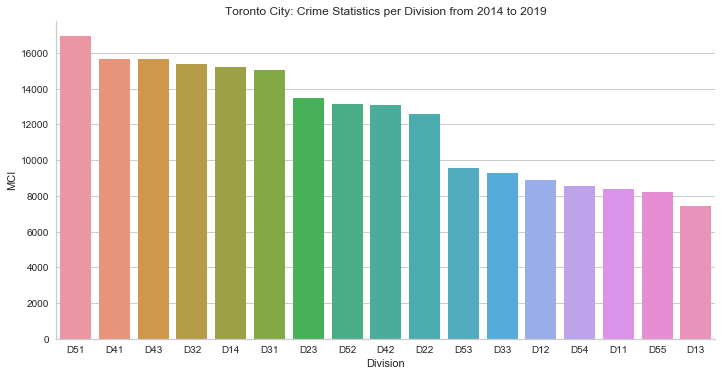

In [108]:
import seaborn as sns
g = sns.catplot(data = mci_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division from 2014 to 2019')

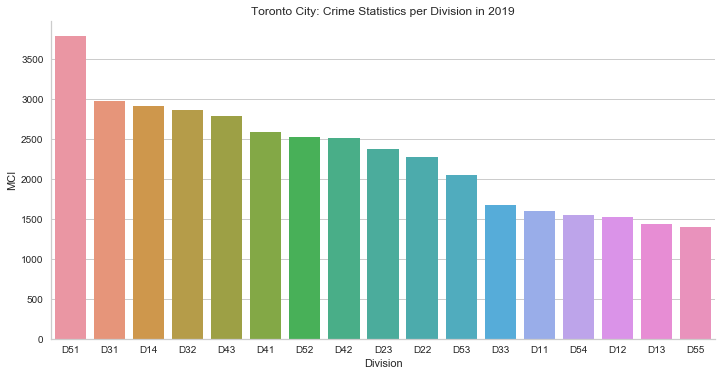

In [109]:
mci_2019 = mci_df[mci_df['reportedyear']==2019]
mci_2019_divison = mci_2019.groupby('Division').count().sort_values(by='offence', ascending=False).reset_index()
mci_2019_divison
g = sns.catplot(data = mci_2019_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division in 2019')

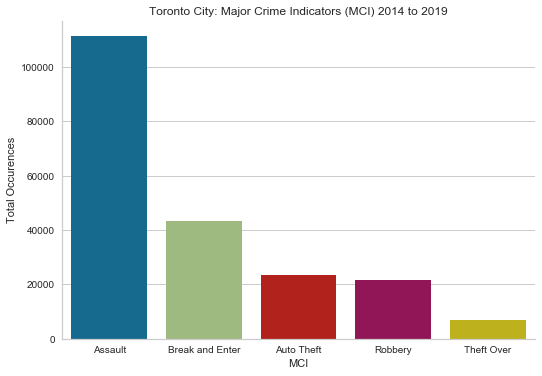

In [119]:
mci_group = mci_df.groupby(by='MCI').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_group, x='MCI', y='offence', kind='bar', aspect=1.5)
g.set(title='Toronto City: Major Crime Indicators (MCI) 2014 to 2019', ylabel='Total Occurences')

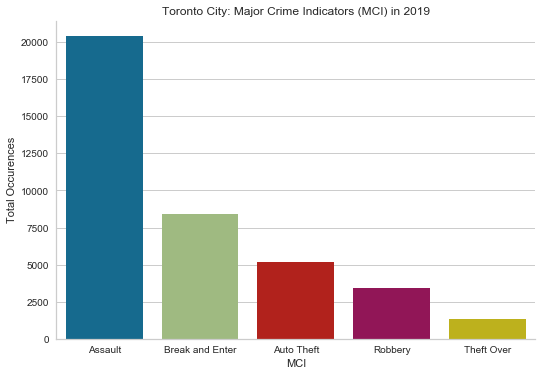

In [120]:
mci_2019_group = mci_2019.groupby(by='MCI').count().sort_values(by='offence', ascending=False).reset_index()
g = sns.catplot(data = mci_2019_group, x='MCI', y='offence', kind='bar', aspect=1.5)
g.set(title='Toronto City: Major Crime Indicators (MCI) in 2019', ylabel='Total Occurences')

Among the 5 MCI, Assault incidents are still number one occurred the most for 6 consecutive years. During the same period, several divisions are consistent about their crime rates. Thus, the divisions fall into three categories:
1. High Crime Rates (D51, D43, D41, D32, D31, D14)
2. Middle Crime Rates (D52, D42, D23, D22)
3. Low Crime Rates (D55, D54, D53, D33, D13, D12, D11)

Finally, to pick the area of interest, the candidates are expected to be:
- safe - having low crime rates
- lively - crowded by people, vehicles, and easy to access
- close to downtown.

Therefore, the divisions qualified are D55, D54, D53, and D13. Referring to Toronto Police Service Wikipedia [6], these divisions cover:
1. Central Toronto (D53)
2. East York (D53, D54,D 55)
3. York (D13)

In the next section, we will explore the neighborhoods inside Central Toronto, East York, and York as the selected boroughs.

### Neighborhoods Analysis

Lastly, we load the 1st data source and preprocess it to be a neighborhood data frame. It contains 103 postal codes, 10 boroughs, neighborhood names inside each borough, and their coordinates. Since we are interested in neighborhoods inside Central Toronto, East York, and York boroughs only, we will filter the dataframe. This results in having 3 boroughs and 19 neighborhoods based on postal code coordinates.

In [219]:
boroughs_df= pd.read_csv('datasets/boroughs_venues.csv')
boroughs_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
3,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery
...,...,...,...,...,...,...,...
900,Summerhill West,43.68568,-79.40237,Harvey's,43.689693,-79.394450,Restaurant
901,Summerhill West,43.68568,-79.40237,L'atelier,43.682148,-79.391696,Furniture / Home Store
902,Summerhill West,43.68568,-79.40237,Queen's Own Rifles of Canada Museum and Archives,43.678472,-79.409308,History Museum
903,Summerhill West,43.68568,-79.40237,La Libre,43.677408,-79.398231,Mexican Restaurant


In [220]:
neighbor_df = boroughs_df.groupby(by='Neighborhood').count().sort_values(by='Venue', ascending=False).reset_index()

In [221]:
neighbor_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville,100,100,100,100,100,100
1,Davisville North,100,100,100,100,100,100
2,The Annex,100,100,100,100,100,100
3,Summerhill West,89,89,89,89,89,89
4,Woodbine Heights,68,68,68,68,68,68
5,Moore Park,66,66,66,66,66,66
6,Leaside,61,61,61,61,61,61
7,East Toronto,60,60,60,60,60,60
8,North Toronto West,49,49,49,49,49,49
9,Thorncliffe Park,38,38,38,38,38,38


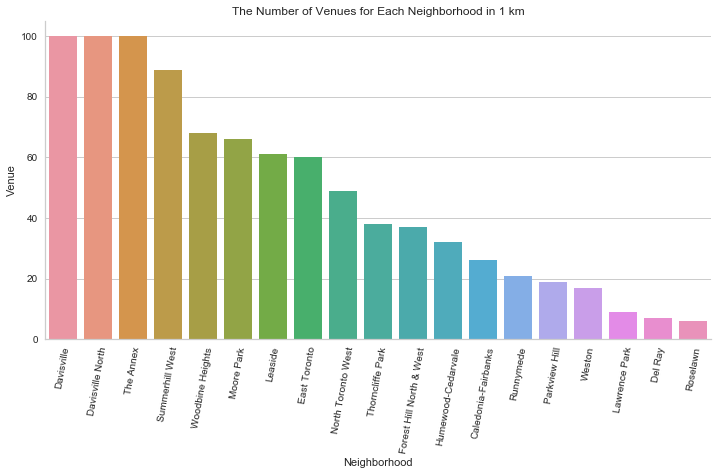

In [230]:
g = sns.catplot( data=neighbor_df, x='Neighborhood', y='Venue', kind='bar', aspect=2)
g.set_xticklabels(rotation=80)
g.set(title='The Number of Venues for Each Neighborhood in 1 km')